# Q3 Analysis

The goal is to identify the least active Senators since 2010. I will be measuring activity by three stats, all included in the cleaned DataFrame:
1. number of bills cosponsored/time served in Senate since 2010
2. number of bills sponsored/time served in Senate since 2010
3. number of votes the Senator was present for/total number of votes the Senator was eligible for

Before aggragating the three stats and listing the overall least active Senators, I will present the categories individually. For each category, I will present:
- the bottom three Senators
- the mean for all Senators
- the mean for each party
- the mean for each gender
- the relationship between the statistic and time served in the Senate

To determine the least active Senators since 2010, I will rank all Senators in each of the three categories, total up their rankings, and present the bottom three (I will also present the top three, just for fun). I will research the bottom three Senators and present any extraordinary circumstances that may be at play.

Finally, I will save all figures for use in a single graphic.

## Modules, Data, and Functions

In [67]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [68]:
df = pd.read_csv("q3CleanedData.csv")
df = df.set_index("id")
df.head()

,party,gender,first_name,last_name,vote_pct,term_length,sponsor_avg,cosponsor_avg
id,,,,,,,,
A000069,D,M,Daniel,Akaka,0.989682,3.0,14.000000,104.666667
A000360,R,M,Lamar,Alexander,0.952560,10.5,10.857143,69.523810
A000368,R,F,Kelly,Ayotte,0.987234,6.0,12.500000,152.833333
B000243,D,M,Max,Baucus,0.992563,4.1,20.731707,64.146341
B000382,R,M,Robert,Bennett,0.914328,1.0,2.000000,62.000000


In [88]:
def makeBarChart(num):
    """Function to make bar graph with means of party, gender, and total, plus actual values
    for lowest values for column provided. Number of lowest values is also provided."""
    fig, ax = plt.subplots(figsize=(4,6))
    means = [df.groupby("party")["vote_pct"].mean()["D"], df.groupby("party")["vote_pct"].mean()["R"], 
             df.groupby("gender")["vote_pct"].mean()["M"], df.groupby("gender")["vote_pct"].mean()["F"],
             df["vote_pct"].mean()]
    labels = ["Democrat", "Republican", "Male", "Female", "All Senators"]
    colors = ["cornflowerblue", "tomato", "mediumpurple", "mediumpurple", "mediumpurple"]
    lowestdf = df.nsmallest(num, "vote_pct")
    lowest_list = list(lowestdf.index)
    for senator in lowest_list:
        means.append(lowestdf.loc[senator]["vote_pct"])
        if lowestdf.loc[senator].party == "R":
            colors.append("tomato")
        else:
            colors.append("cornflowerblue")
        labels.append(lowestdf.loc[senator].first_name + " " +lowestdf.loc[senator].last_name)
    ax.barh(labels, means, label=labels, color=colors)
    ax.invert_yaxis()
    ax.set_title("Percentage of votes attended since 2010 among all senators")
    plt.show()

In [93]:
def makeBarChartYear(num):
    """Function to make bar graph with means of party, gender, and total, plus actual values
    for lowest values for column provided. Number of lowest values is also user provided."""
    fig, ax = plt.subplots(figsize=(4,6))
    means = [df.groupby("party")["vote_pct"].mean()["D"], df.groupby("party")["vote_pct"].mean()["R"], 
             df.groupby("gender")["vote_pct"].mean()["M"], df.groupby("gender")["vote_pct"].mean()["F"],
             df["vote_pct"].mean()]
    labels = ["Democrat", "Republican", "Male", "Female", "All Senators"]
    colors = ["cornflowerblue", "tomato", "mediumpurple", "mediumpurple", "mediumpurple"]
    
    lowyeardf = df[df.term_length > 1].nsmallest(num, "vote_pct")
    lowyear_list = list(lowyeardf.index)
    for senator in lowyear_list:
        means.append(lowyeardf.loc[senator]["vote_pct"])
        if lowyeardf.loc[senator].party == "R":
            colors.append("tomato")
        else:
            colors.append("cornflowerblue")
        labels.append(lowyeardf.loc[senator].first_name + " " +lowyeardf.loc[senator].last_name)
    ax.barh(labels, means, label=labels, color=colors)
    ax.invert_yaxis()
    ax.set_title("Percentage of votes attended since 2010 among senators with over 1 year of service")
    plt.show()



## <br>Vote percentage

In [97]:
interactive_plot = interactive(makeBarChart, 
                               num=widgets.IntSlider(value=3,
                                                     min=0,
                                                     max=10,
                                                     step=1,
                                                     description="Show lowest senators:",
                                                     continuous_update=False))
interactive_plot

interactive(children=(IntSlider(value=3, continuous_update=False, description='Show lowest senators:', max=10)…

In [98]:
interactive_plot_year = interactive(makeBarChartYear, 
                               num=widgets.IntSlider(value=3,
                                                     min=0,
                                                     max=10,
                                                     step=1,
                                                     description="Show lowest senators:",
                                                     continuous_update=False))
interactive_plot_year

interactive(children=(IntSlider(value=3, continuous_update=False, description='Show lowest senators:', max=10)…

In [100]:
accordion = widgets.Accordion(children=[interactive_plot, interactive_plot_year])
accordion.set_title(0, 'Senators with lowest voting percentage')
accordion.set_title(1, 'Senators with lowest voting percentage (over 1 year of service)')
accordion

Accordion(children=(interactive(children=(IntSlider(value=3, continuous_update=False, description='Show lowest…

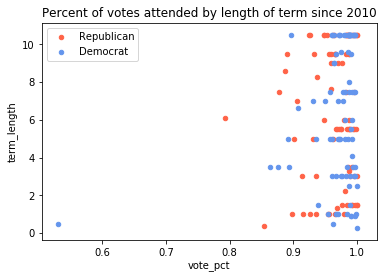

In [70]:
vote_scatter = makeScatterPlot(df, "vote_pct", "term_length", "Percent of votes attended by length of term since 2010")
fig = vote_scatter.get_figure()
fig.savefig("voteScatter.png")

__From outside research, I know that Robert Byrd, the senator with the lowest vote percentage and the outlier dot on the bottom left of the scatter plot, passed away six months into 2010, and it is likely that this illness contributed to his low vote percentage. Additionally, the third lowest senator by vote percentage,  Jeffrey Chiesa, was a temporary appointment who served for only five months during 2013.__<br><br>__I think it is important for voters to see how illness and temporary appointments could potentially affect vote percentage, so I will not remove these senators. However, as others may disagree, I will also show the lowest 3 senators with at least one year in office.__

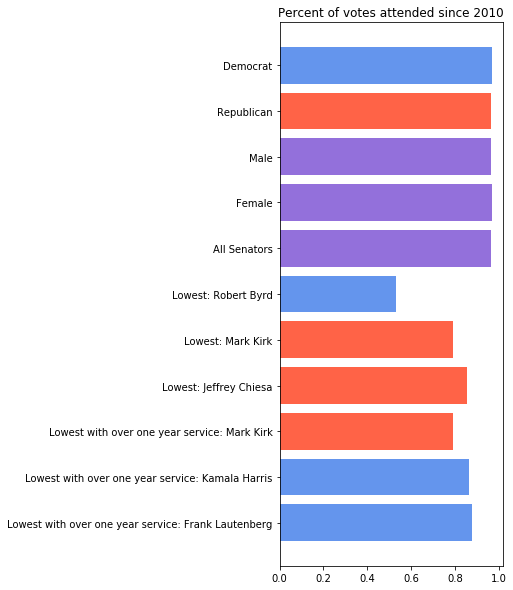

In [71]:
vote_bar_year = makeBarChartYear(df, "vote_pct", 3, "Percent of votes attended since 2010")
vote_bar_year.savefig("voteBar.png", bbox_inches="tight")

#### Note: I am not concerned with the look of text for these plots, as it will be edited for the final figure.

## <br>Bill Sponsorship

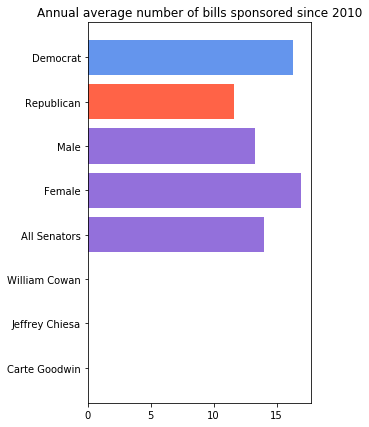

In [72]:
sponsor_bar = makeBarChart(df, "sponsor_avg", 3, "Annual average number of bills sponsored since 2010")

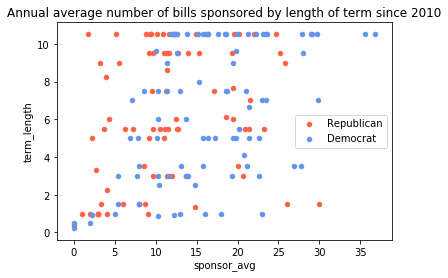

In [73]:
sponsor_scatter = makeScatterPlot(df, "sponsor_avg", "term_length", "Annual average number of bills sponsored by length of term since 2010")
fig = sponsor_scatter.get_figure()
fig.savefig("sponsorScatter.png")

Again, all three lowest bill sponosors were serving temporary appointments. I will expand the bar graph.

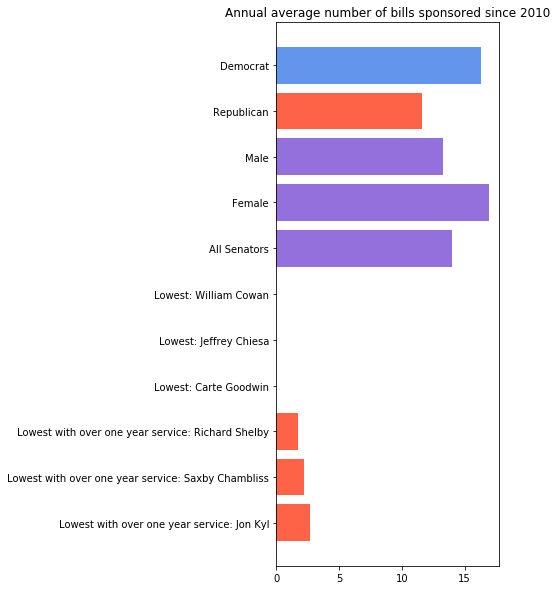

In [74]:
sponsor_bar_year = makeBarChartYear(df, "sponsor_avg", 3, "Annual average number of bills sponsored since 2010")
sponsor_bar_year.savefig("sponsorBar.png", bbox_inches="tight")

## Bill Cosponsorship

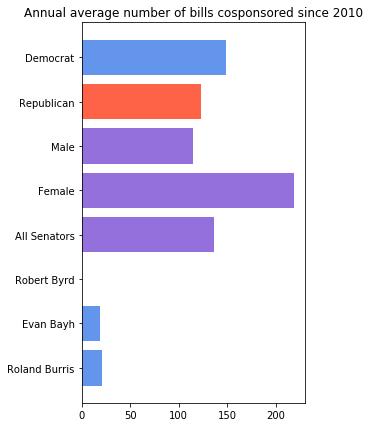

In [75]:
cosponsor_bar = makeBarChart(df, "cosponsor_avg", 3, "Annual average number of bills cosponsored since 2010")

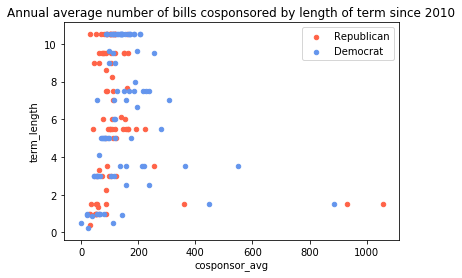

In [76]:
cosponsor_scatter = makeScatterPlot(df, "cosponsor_avg", "term_length", "Annual average number of bills cosponsored by length of term since 2010")
fig = cosponsor_scatter.get_figure()
fig.savefig("cosponsorScatter.png")

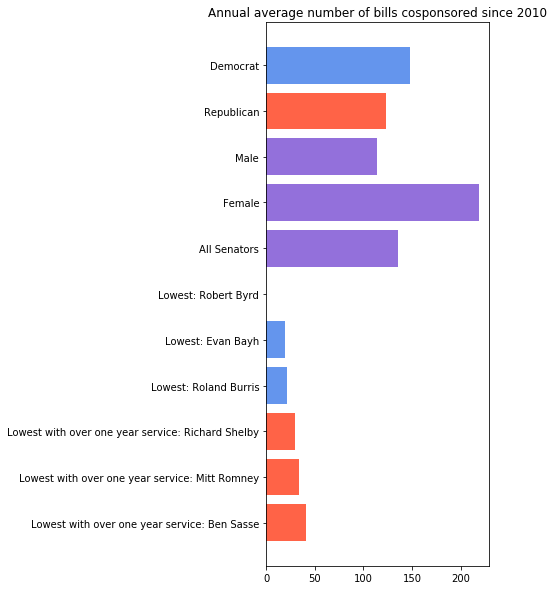

In [77]:
cosponsor_bar_year = makeBarChartYear(df, "cosponsor_avg", 3, "Annual average number of bills cosponsored since 2010")
cosponsor_bar_year.savefig("cosponsorBar.png", bbox_inches="tight")

## <br>Total Activity Scores

#### Adding columns with each senator's rank in each of the three activities, plus the sum of the three ranks, and the final rank in the total sum category:

In [78]:
df["vote_rank"] = df["vote_pct"].rank()
df["sponsor_rank"] = df["sponsor_avg"].rank()
df["cosponsor_rank"] = df["cosponsor_avg"].rank()
df["sum_rank"] = df["vote_rank"] + df["sponsor_rank"] + df["cosponsor_rank"]
df["final_rank"] = df["sum_rank"].rank()

#### Changing the index to the senator's full name:

In [79]:
df["full_name"] = df["first_name"] + " " + df["last_name"]
df = df.set_index("full_name")

#### Making a new DataFrame without the raw vote percentage or raw sponsorship counts; renaming column headers for readability:

In [80]:
columns_to_drop = ["first_name", "last_name", "vote_pct", "sponsor_avg", "cosponsor_avg", "sum_rank"]
df_small = df.drop(columns_to_drop, axis=1)
df_small.columns = ["party", "gender", "years in office", "vote rank", "sponsor rank", "cosponsor rank", "final rank"]
df_small.index.names = ["Senator"]
df_small.head()

,party,gender,years in office,vote rank,sponsor rank,cosponsor rank,final rank
Senator,,,,,,,
Daniel Akaka,D,M,3.0,127.5,96.5,78.0,111.5
Lamar Alexander,R,M,10.5,33.0,60.0,37.0,18.5
Kelly Ayotte,R,F,6.0,114.0,82.0,126.0,123.5
Max Baucus,D,M,4.1,141.0,135.0,34.0,118.0
Robert Bennett,R,M,1.0,17.0,6.5,30.5,6.0


#### The least active senators (I chose 15 to view, but you can experiment with the number):

In [81]:
df_least_active = df_small.nsmallest(15, "final rank")
df_least_active

,party,gender,years in office,vote rank,sponsor rank,cosponsor rank,final rank
Senator,,,,,,,
Robert Byrd,D,M,0.5,1.0,6.5,1.0,1.0
Jeffrey Chiesa,R,M,0.4,3.0,2.0,7.5,2.0
Judd Gregg,R,M,1.0,12.0,12.5,7.5,3.0
Jim Bunning,R,M,1.0,24.0,4.0,5.0,4.0
Christopher Bond,R,M,1.0,19.0,12.5,16.5,5.0
Robert Bennett,R,M,1.0,17.0,6.5,30.5,6.0
George Voinovich,R,M,1.0,34.5,19.5,15.0,7.0
Evan Bayh,D,M,1.0,60.0,22.0,2.0,8.5
Jeff Sessions,R,M,9.0,40.0,15.0,29.0,8.5


#### The most active senators since 2010:

In [82]:
df_most_active = df_small.nlargest(15, "final rank")
df_most_active

,party,gender,years in office,vote rank,sponsor rank,cosponsor rank,final rank
Senator,,,,,,,
Martha McSally,R,F,1.5,138.5,167.0,163.0,169.0
Marsha Blackburn,R,F,1.5,138.5,158.0,169.0,168.0
Richard Blumenthal,D,M,9.5,129.0,162.0,160.0,167.0
Tammy Baldwin,D,F,7.5,155.0,137.0,158.0,166.0
Benjamin Cardin,D,M,10.5,158.0,163.0,127.0,165.0
Susan Collins,R,F,10.5,166.0,133.0,133.0,164.0
Gary Peters,D,M,5.5,133.0,132.0,161.0,163.0
Sherrod Brown,D,M,10.5,115.0,161.0,145.0,161.5
Tina Smith,D,F,2.5,166.0,98.0,157.0,161.5


In [83]:
df_small.groupby("gender")[["party"]].count()

,party
gender,
F,35
M,134


Women make up 40% of the top 15 most active senators, while only making up 20% of total senators since 2010.<br>Men make up 100% of the 30 least active senators, while making up 60% of total senators since 2010.<br>